# **Author: Dr. Mohammad Javad Parseh (Jahrom University)**

## Spatial Filters

### Introduction

We associate filters (such as a water filter) with removing undesirable impurities. Similarly, in image processing, a filter removes undesirable impurities which includes noise.

There are two types of filters: ***linear filters*** and ***non-linear filters***.
Linear filters include mean, Laplacian and Laplacian of Gaussian. Nonlinear filters include median, maximum, minimum, Sobel, Prewitt and
Canny filters.

Image enhancement can be accomplished in two domains: ***spatial***
and ***frequency***. The spatial domain constitutes all the pixels in an image.
Distances in the image (in pixels) correspond to real distances in micrometers, inches, etc. The domain over which the Fourier transformation of an image ranges is known as the frequency domain of the image. We begin with image enhancement techniques in the spatial domain.

The Python modules that are used in this chapter are `scikits` and
`scipy`.

### Filtering

For filtering, a filter or mask is used. It is usually a two-dimensional
square window that moves across the image affecting only one pixel at a time. Each number in the filter is known as a coefficient. The coefficients in the filter determine the effects of the filter and consequently the output image. Let us consider a 3-by-3 filter.

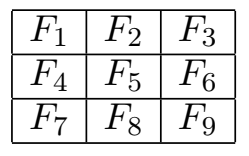

If `(i,j)` is the pixel in the image, then a sub-image around `(i,j)` of
the same dimension as the filter is considered for filtering. The center of the filter is placed to overlap with `(i,j)`. The pixels in the sub-image are multiplied with the corresponding coefficients in the filter. This yields a matrix of the same size as the filter. The matrix is simplified using a mathematical equation to obtain a single value that will replace the pixel value in `(i,j)` of the image. This process
of sliding a filter window over an image is called ***convolution*** in the ***spatial domain***.

Unlike other filters discussed in this chapter, the `mean filter` does not have a scipy.ndimage module function. However, we can use the convolve function to achieve the intended result.

### Mean Filter

<ipython-input-5-00890243fb94>:18: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b1 = scipy.ndimage.filters.convolve(a, k1)
<ipython-input-5-00890243fb94>:19: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b2 = scipy.ndimage.filters.convolve(a, k2)


True

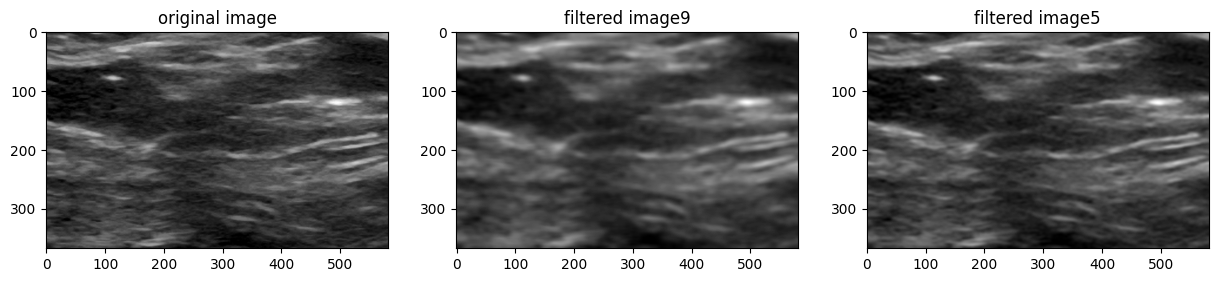

In [5]:
import cv2
import numpy as np
import scipy.ndimage
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# Opening the image using cv2.
a = cv2.imread(os.path.join(base_path, 'images/ultrasound_muscle.png'))
# Converting the image to grayscale.
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Initializing the filter of size 5 by 5.
# The filter is divided by 25 for normalization.
k1 = np.ones((9,9))/81
k2 = np.ones((5,5))/25
# performing convolution
b1 = scipy.ndimage.filters.convolve(a, k1)
b2 = scipy.ndimage.filters.convolve(a, k2)
# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(a, 'gray')

plt.subplot(1,3,2)
plt.title('filtered image9')
plt.imshow(b1, 'gray')

plt.subplot(1,3,3)
plt.title('filtered image5')
plt.imshow(b2, 'gray')

# Writing b to a file.
cv2.imwrite('mean_output.png', b)

In [7]:
import numpy as np
import scipy.ndimage

x = np.asarray([[1,2,3],[4,5,6],[7,8,9]])
k = np.ones([3,3])*2
k[1,1] = 5
y = scipy.ndimage.filters.convolve(x, k, mode='constant', cval=0)
y

<ipython-input-7-609a142fc7bc>:7: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  y = scipy.ndimage.filters.convolve(x, k, mode='constant', cval=0)


array([[ 27,  48,  41],
       [ 66, 105,  84],
       [ 69, 102,  83]])

In [10]:
import numpy as np
from scipy import signal
from scipy import datasets
x = np.asarray([[1,2,3],[4,5,6],[7,8,9]])
k = np.ones([3,3])*2
k[1,1] = 5
grad = signal.convolve2d(x, k, boundary='fill', mode='full')
grad

array([[  2.,   6.,  12.,  10.,   6.],
       [ 10.,  27.,  48.,  41.,  18.],
       [ 24.,  66., 105.,  84.,  36.],
       [ 22.,  69., 102.,  83.,  30.],
       [ 14.,  30.,  48.,  34.,  18.]])

### Gaussian Filter

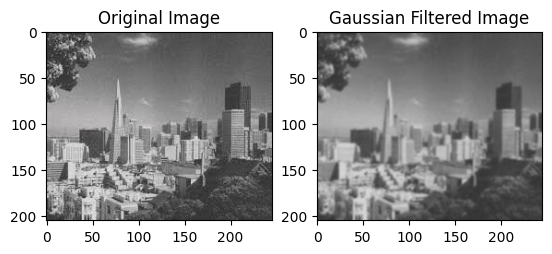

In [ ]:
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import gaussian_filter

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# Opening the image using cv2.
a = cv2.imread(os.path.join(base_path, 'images/gfilter.jpg'))
sigma = 1
b = gaussian_filter(a, sigma=sigma)
plt.subplot(1, 2, 1)
plt.imshow(a)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(b)
plt.title('Gaussian Filtered Image')
plt.show()

### Median Filter

<ipython-input-16-60a879e414d1>:12: DeprecationWarning: Please import `median_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = scipy.ndimage.filters.median_filter(a, size=5)


True

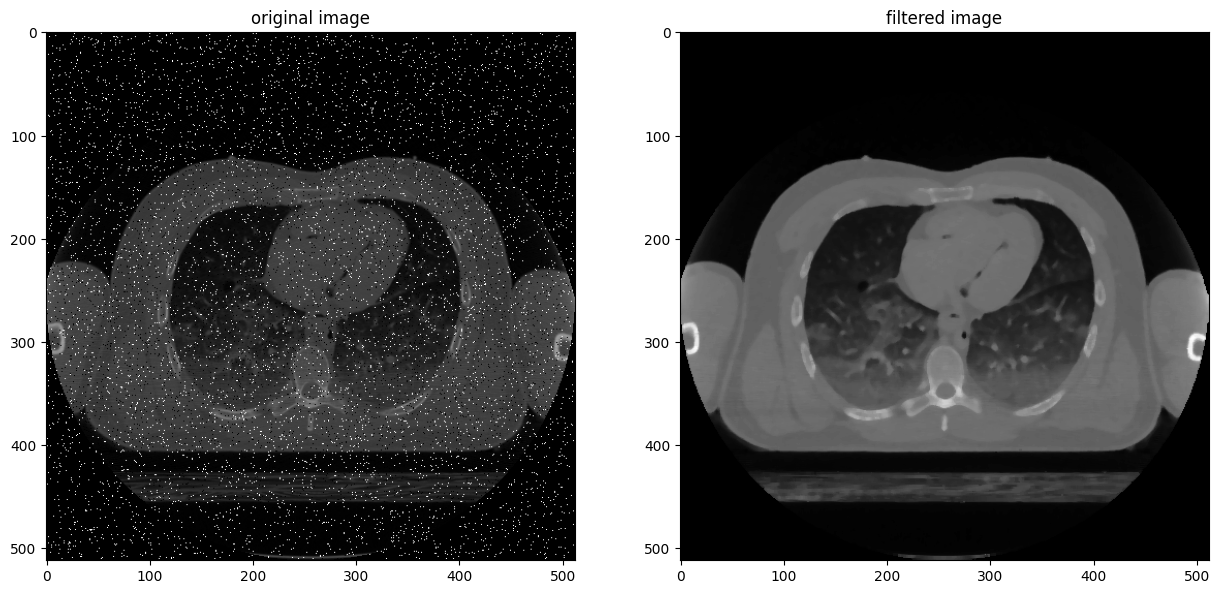

In [16]:
import cv2
import scipy.ndimage
import os
from google.colab.patches import cv2_imshow

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# Opening the image using cv2.
a = cv2.imread(os.path.join(base_path, 'images/ct_saltandpepper.png'))
# Converting the image to grayscale.
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Performing the median filter.
b = scipy.ndimage.filters.median_filter(a, size=5)
# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, 'gray')

plt.subplot(1,2,2)
plt.title('filtered image')
plt.imshow(b, 'gray')
# Saving b as median_output.png in Figures folder
cv2.imwrite('median_output.png', b)

### Max Filter

<ipython-input-17-6d167de36ee1>:10: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = scipy.ndimage.filters.maximum_filter(a, size=5)


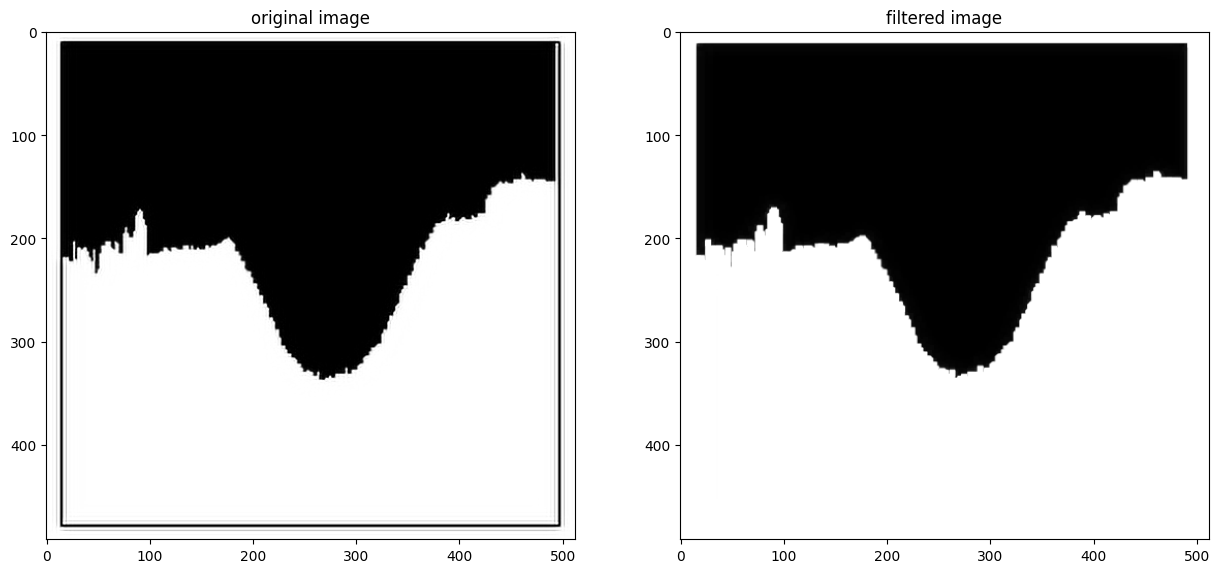

In [17]:
import scipy.misc
import scipy.ndimage
from PIL import Image
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# opening the image and converting it to grayscale
a = Image.open(os.path.join(base_path, 'images/wave.png')).convert('L')
# performing maximum filter
b = scipy.ndimage.filters.maximum_filter(a, size=5)
# b is converted from an ndarray to an image
b = Image.fromarray(b)
b.save('maxo.png')
# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, 'gray')

plt.subplot(1,2,2)
plt.title('filtered image')
plt.imshow(b, 'gray')


### Min Filter

<ipython-input-18-3165a2cfc8e5>:10: DeprecationWarning: Please import `minimum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = scipy.ndimage.filters.minimum_filter(a, size=5)


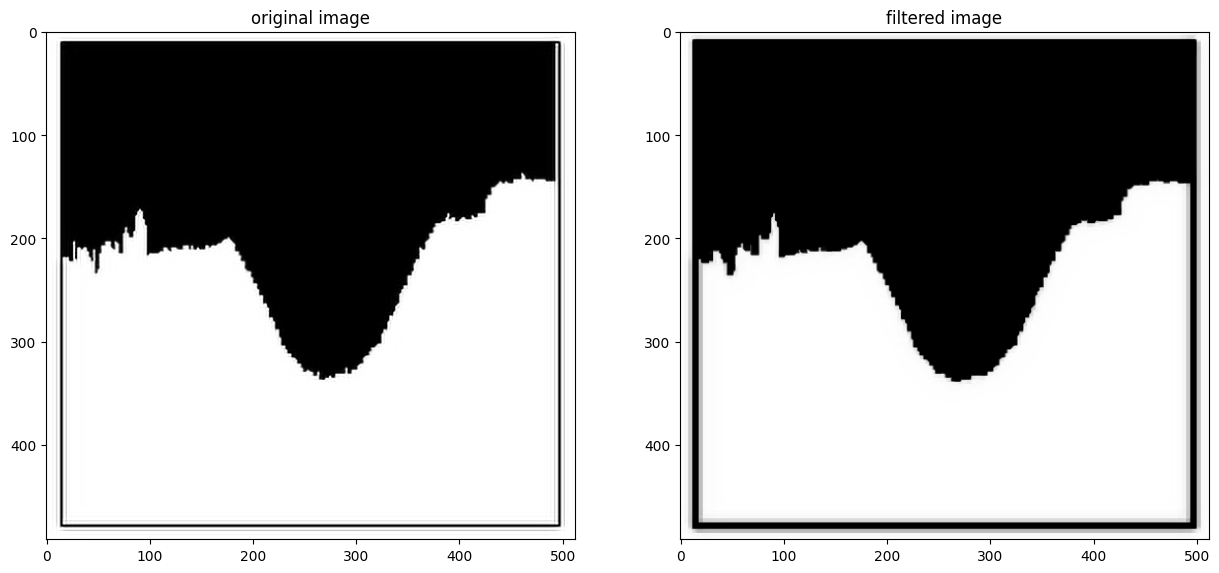

In [18]:
import scipy.misc
import scipy.ndimage
from PIL import Image
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# opening the image and converting it to grayscale
a = Image.open(os.path.join(base_path, 'images/wave.png')).convert('L')
# performing maximum filter
b = scipy.ndimage.filters.minimum_filter(a, size=5)
# b is converted from an ndarray to an image
b = Image.fromarray(b)
b.save('maxo.png')
# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, 'gray')

plt.subplot(1,2,2)
plt.title('filtered image')
plt.imshow(b, 'gray')

### **Edge Detection using Derivatives**

### Sobel Filter

True

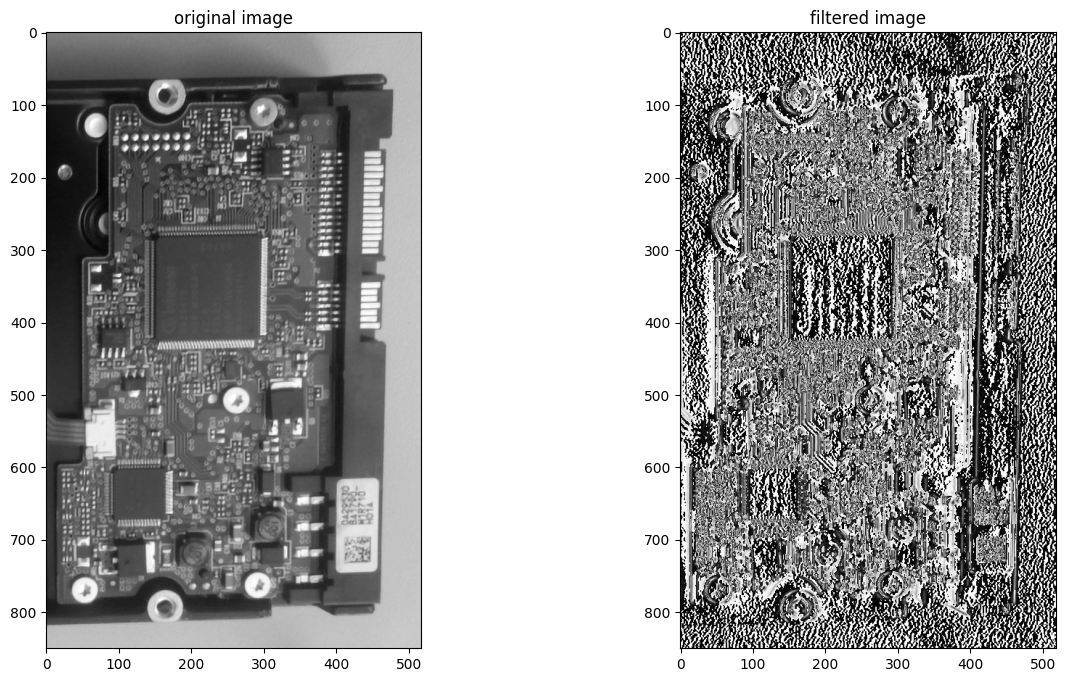

In [19]:
import cv2
from scipy import ndimage
import os
from google.colab.patches import cv2_imshow

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# Opening the image.
a = cv2.imread(os.path.join(base_path, 'images/cir.png'))
# Converting a to grayscale .
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Performing Sobel filter.
b = ndimage.sobel(a)
# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, 'gray')

plt.subplot(1,2,2)
plt.title('filtered image')
plt.imshow(b, 'gray')
# Saving b.
cv2.imwrite('sobel_cir.png', b)

### Prewitt Filter

True

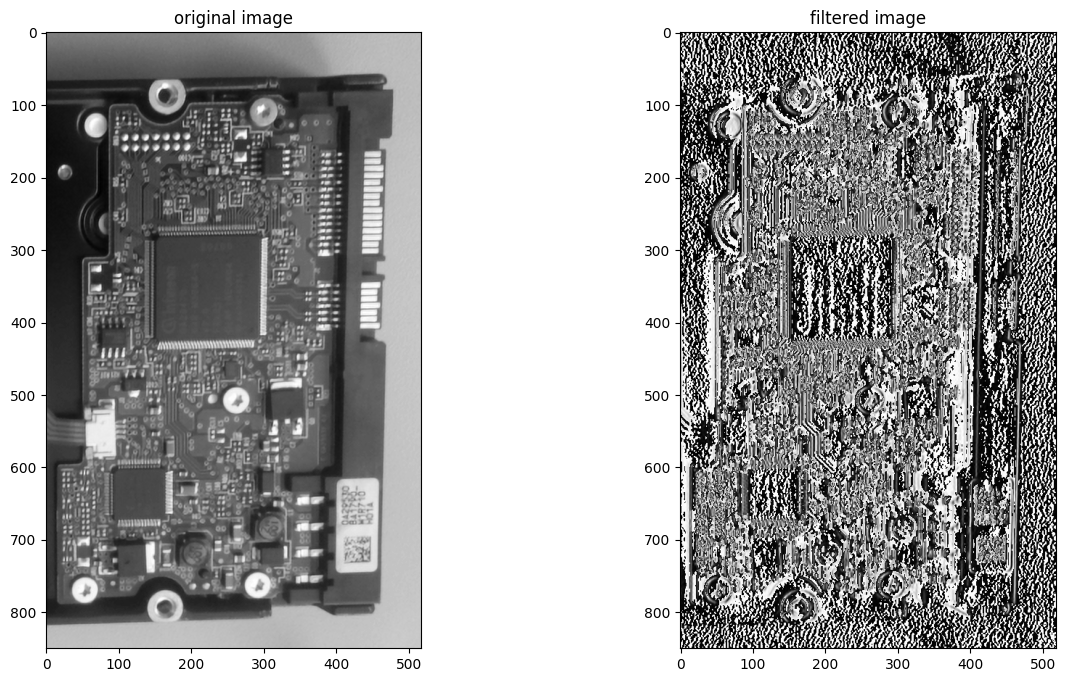

In [20]:
import cv2
from scipy import ndimage
import os
from google.colab.patches import cv2_imshow

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# Opening the image.
a = cv2.imread(os.path.join(base_path, 'images/cir.png'))
# Converting a to grayscale .
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Performing Sobel filter.
b = ndimage.prewitt(a)
# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, 'gray')

plt.subplot(1,2,2)
plt.title('filtered image')
plt.imshow(b, 'gray')
# Saving b.
cv2.imwrite('prewitt_cir.png', b)

True

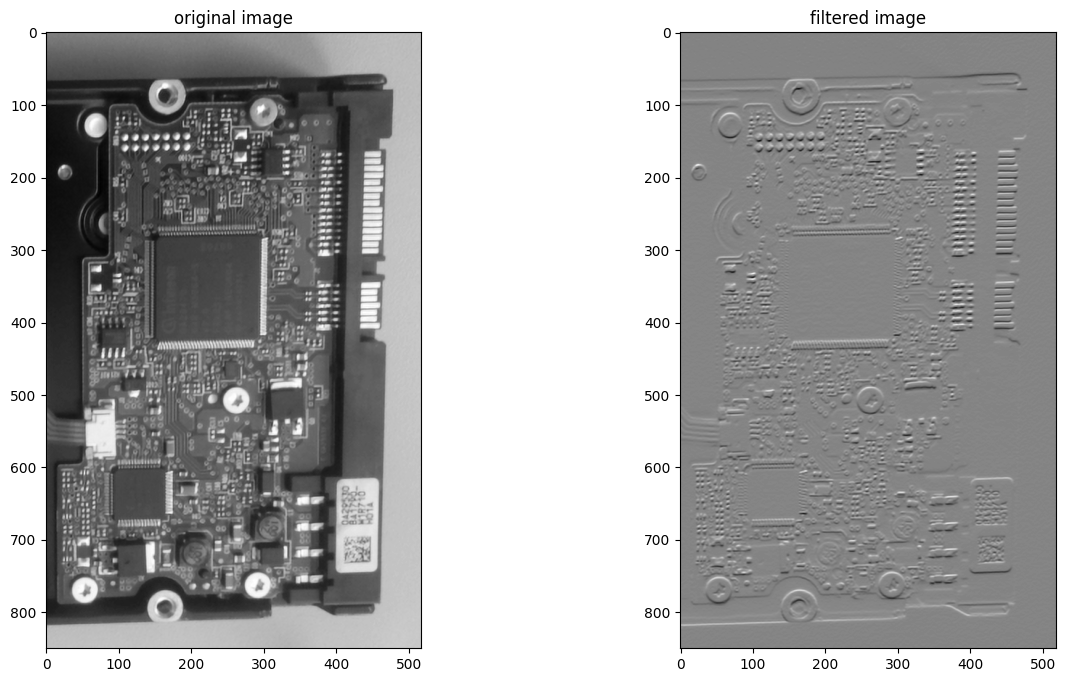

In [21]:
import cv2
from skimage import filters
import os
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# Opening the image.
a = cv2.imread(os.path.join(base_path, 'images/cir.png'))
# Converting a to grayscale .
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Performing Sobel filter.
b = filters.prewitt_h(a)
# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, 'gray')

plt.subplot(1,2,2)
plt.title('filtered image')
plt.imshow(b, 'gray')

# Saving b.
cv2.imwrite('prewitt_v_cir.png', b)

### Canny Filter

True

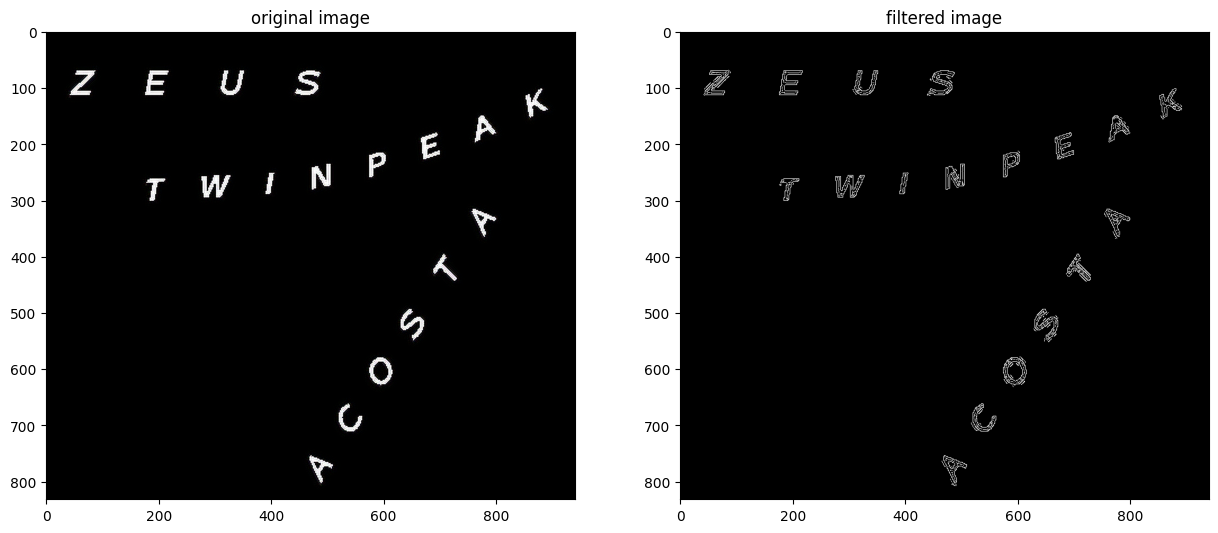

In [22]:
import cv2
from matplotlib import pyplot as plt

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# Opening the image.
a = cv2.imread(os.path.join(base_path, 'images/maps1.png'))
# Performing Canny edge filter.
b = cv2.Canny(a, 100, 200)
# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, 'gray')

plt.subplot(1,2,2)
plt.title('filtered image')
plt.imshow(b, 'gray')
# Saving b.
cv2.imwrite('canny_output.png', b)

True

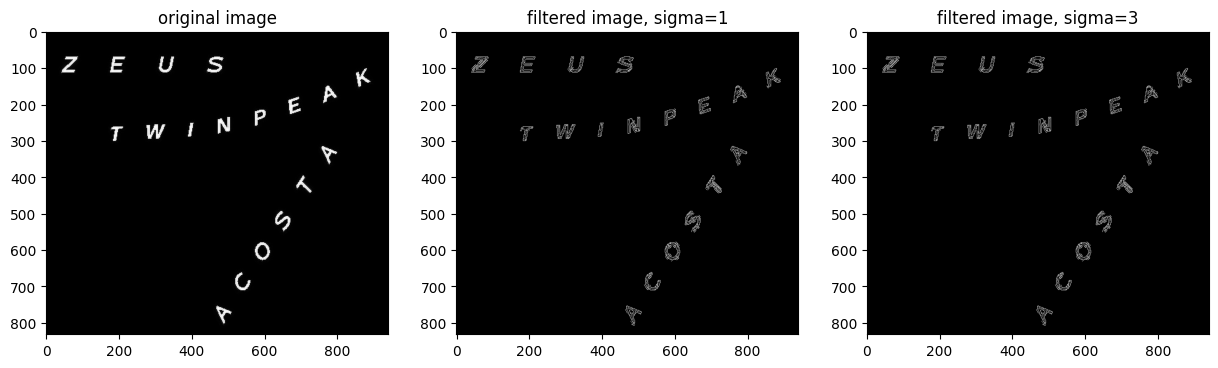

In [24]:
from skimage import feature
import cv2
from matplotlib import pyplot as plt

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# Opening the image.
a1 = cv2.imread(os.path.join(base_path, 'images/maps1.png'))
a = cv2.cvtColor(a1, cv2.COLOR_BGR2GRAY)
# Performing Canny edge filter.
b1 = feature.canny(a)
b2 = feature.canny(a, sigma=3)
# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(a, 'gray')

plt.subplot(1,3,2)
plt.title('filtered image, sigma=1')
plt.imshow(b, 'gray')

plt.subplot(1,3,3)
plt.title('filtered image, sigma=3')
plt.imshow(b, 'gray')

# Saving b.
cv2.imwrite('canny_output.png', b)

### Laplacian of Gaussian Filter (LoG)

<ipython-input-20-5798811469dc>:9: DeprecationWarning: Please import `gaussian_laplace` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = scipy.ndimage.filters.gaussian_laplace(a, sigma=2, mode='reflect')


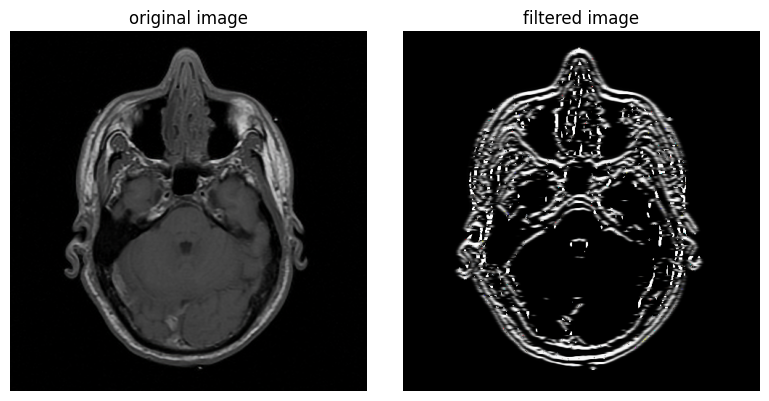

True

In [ ]:
import cv2
import scipy.ndimage
from matplotlib import pyplot as plt

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# Opening the image.
a = cv2.imread(os.path.join(base_path, 'images/vhuman_t1.png'))
# Performing Laplacian of Gaussian.
b = scipy.ndimage.filters.gaussian_laplace(a, sigma=2, mode='reflect')
# Show Images

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

axes[0].imshow(a, cmap=plt.cm.gray)
axes[0].set_title('original image')

axes[1].imshow(b, cmap=plt.cm.gray)
axes[1].set_title('filtered image')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()
# Saving b.
cv2.imwrite('LoG_output.png', b)

### **Shape Detecting Filter**

### Frangi Filter

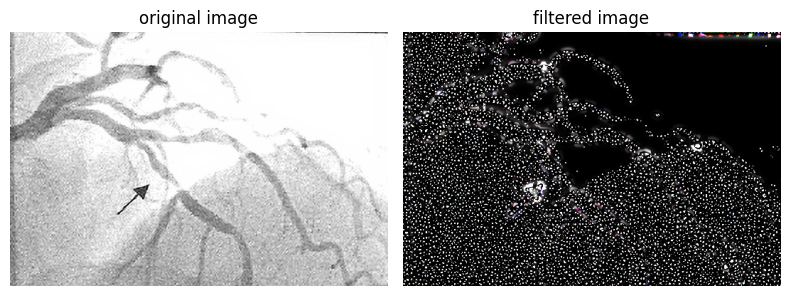

True

In [ ]:
import cv2
import numpy as np
import numpy as np
from PIL import Image
from skimage.filters import frangi


base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter04'
# Opening the image.
a = cv2.imread(os.path.join(base_path, 'images/angiogram1.png'))
img1 = np.asarray(a)
img2 = frangi(img1, black_ridges=True)
b = 255*(img2-np.min(img2))/(np.max(img2)-np.min(img2))

# Show Images

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

axes[0].imshow(a, cmap=plt.cm.gray)
axes[0].set_title('original image')

axes[1].imshow(b, cmap=plt.cm.gray)
axes[1].set_title('filtered image')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()
# Save image
cv2.imwrite('frangi_output.png', b)